**Exercise 8.1c**

Plot functions of the form x cos(ax) on a single figure using various values of a. Include a legend.

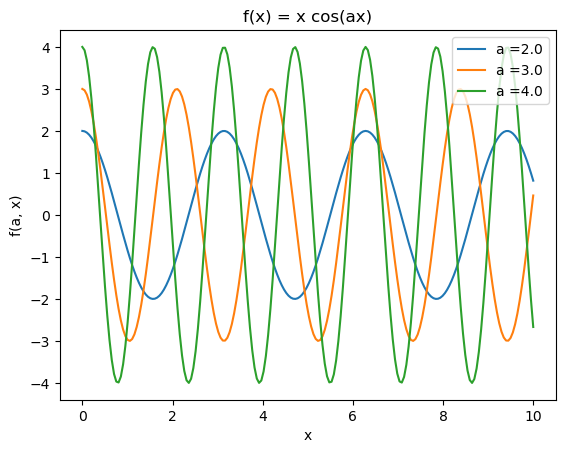

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

def f(a, x): 
    return x * np.cos(a * x)

# parameter values 
a1 = 2.0
a2 = 3.0
a3 = 4.0 

# create x array 
x = np.linspace(0,10,200)

# create figure 
plt.close() 
fig, (ax1) = plt.subplots(1, 1)
ax1.plot(x,f(x,a1),label = 'a =' + str(a1)) 
ax1.plot(x,f(x,a2),label = 'a =' + str(a2)) 
ax1.plot(x,f(x,a3),label = 'a =' + str(a3)) 

ax1.legend() 
plt.title("f(x) = x cos(ax)")
plt.xlabel("x")
plt.ylabel("f(a, x)")
plt.show()

**Exercise 8.2a**

Run the code:

    A = np.linspace(0, 5, 20)
    np.savetxt("myarray.txt", A)

Does the file myarray.txt appear in the expected location? Does it have the right content? Now read the file myarray.txt into a NumPy array B:

    B = np.loadtxt("myarray.txt")
    print(B)

Does B equal A?

ANSWER: Yes, B is equal to A. 

In [11]:
import numpy as np 

A = np.linspace(0, 5, 20)
np.savetxt("myarray.txt", A)
print(A)

B = np.loadtxt("myarray.txt")
print(B)

print(A == B)

[0.         0.26315789 0.52631579 0.78947368 1.05263158 1.31578947
 1.57894737 1.84210526 2.10526316 2.36842105 2.63157895 2.89473684
 3.15789474 3.42105263 3.68421053 3.94736842 4.21052632 4.47368421
 4.73684211 5.        ]
[0.         0.26315789 0.52631579 0.78947368 1.05263158 1.31578947
 1.57894737 1.84210526 2.10526316 2.36842105 2.63157895 2.89473684
 3.15789474 3.42105263 3.68421053 3.94736842 4.21052632 4.47368421
 4.73684211 5.        ]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


**Exercise 8.2g**
Write a program that uses def to define the function y = e^(sin x). Have your code compute y for at least 100 values of x from -pi to pi. Output the x and y data to a file. Write a second program that will read the data from the file and plot a graph of y versus x.

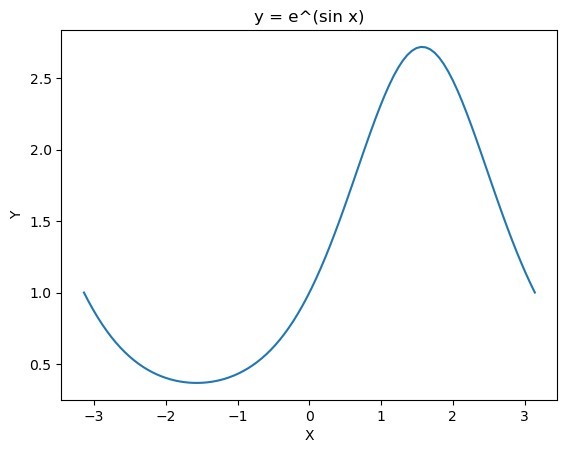

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def y(x):
    return np.exp(np.sin(x))

x = np.linspace(-1 * np.pi, np.pi, 100)
np.savetxt("x-array.txt", x)

y = y(x)
np.savetxt("y-array.txt", y)

y_load = np.loadtxt("y-array.txt")
x_load = np.loadtxt("x-array.txt")

plt.close()
plt.plot(x_load, y_load)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("y = e^(sin x)")
plt.show()

**Exercise 8.3b**
Create a code that produces N random real numbers from low = 0 to high = 1. Find the average of these numbers. Does the average tend to converge to 0.5 as N increases from 10^2 to 10^4? 10^6?

ANSWER: Yes, it does converge (the answer gets closer to being exactly 0.5 with each of those numbers). 

In [17]:
import numpy as np

def random_average(N):
    total = 0
    rnum = np.random.default_rng()
    for i in range(N):
        total = total + rnum.uniform(0, 1) # produces random real number, while rnum.integers would produce a random int
    return total / N

print(random_average(10 ** 2))
print(random_average(10 ** 4))
print(random_average(10 ** 6))

0.487192547623936
0.5067338952778725
0.5000760931690806


**Exercise 8.4**
Create a NumPy array of random real numbers from 0 to 10. Save the array to a text file with the numbers expressed to 8 significant f igures.

In [21]:
import numpy as np

# np.savetxt("filename.txt", A, "%.5f")
A = []
rnum = np.random.default_rng()
for i in range(10): # array of 10 numbers, since it's not specified 
    A = np.append(A, rnum.uniform(0, 10)) # including low, excluding high 

np.savetxt("myarray-2.txt", A, "%.8g") #.f is decimal places, .e is scientific notation

**Exercise 9.2**

Write a code to simulate a player who plays roulette, always bets on “even,” and uses the martingale betting system. The minimum bet is 1 and the player has 20 to gamble. The output of your code might look something like this:

round 1 bet is 1 
ball lands on 23
you lose 1, you have 19 

round 2 bet is 2 
ball lands on 16
you win 2, you have 21 

round 3 bet is 1 
ball lands on 0
you lose 1, you have 20 

round 4 bet is 2 
ball lands on 7
you lose 2, you have 18 

round 5 bet is 4 
ball lands on 34 
you win 4, you have 22 

round 6 bet is 1 
ball lands on 11 
you lose 1, you have 21 

round 7 bet is 2 
ball lands on 28 
you win 2, you have 23

The player can double their bet after each loss only as long as they have enough money to do so. If not, the player just bets as much as possible. 

The play must stop if the player is bankrupt. Let’s also assume that the player is not greedy; their goal is come away with 100. Write your code such that the play stops if either:

- The player’s money reaches 100. (The code should print out a message such as “Congratulations!”.)
- The player’s money reaches 0. (The code should print out a message such as “Sorry, you’re bankrupt”.)

Run your code many times. How often are you bankrupt? How often do you win 100?

ANSWER: I went bankrupt every time I ran it. 

In [30]:
import numpy as np

money = 20
rng = np.random.default_rng()

bet = 1
round_num = 1

while money > 0 and money < 100:
    wager = min(bet, money)
    spin = rng.integers(1, 39) 

    if spin <= 36 and spin % 2 == 0:
        money += wager
        print("round", round_num, "bet is", wager)
        print("ball lands on", spin)
        print("you win", wager,", you have", money, "\n")
        bet = 1 # reset
    else:
        money -= wager
        print("round", round_num, "bet is", wager)
        if spin == 37:
            print("ball lands on 0")
        elif spin == 38:
            print("ball lands on 00")
        else:
            print("ball lands on", spin)
        print("you lose", wager,", you have", money, "\n")
        bet *= 2  # double bet after loss

    round_num += 1

if money >= 100:
    print("Congratulations! You reached 100.")
else:
    print("Sorry, you're bankrupt!")

round 1 bet is 1
ball lands on 32
you win 1 , you have 21 

round 2 bet is 1
ball lands on 35
you lose 1 , you have 20 

round 3 bet is 2
ball lands on 10
you win 2 , you have 22 

round 4 bet is 1
ball lands on 16
you win 1 , you have 23 

round 5 bet is 1
ball lands on 13
you lose 1 , you have 22 

round 6 bet is 2
ball lands on 19
you lose 2 , you have 20 

round 7 bet is 4
ball lands on 20
you win 4 , you have 24 

round 8 bet is 1
ball lands on 15
you lose 1 , you have 23 

round 9 bet is 2
ball lands on 11
you lose 2 , you have 21 

round 10 bet is 4
ball lands on 15
you lose 4 , you have 17 

round 11 bet is 8
ball lands on 33
you lose 8 , you have 9 

round 12 bet is 9
ball lands on 00
you lose 9 , you have 0 

Sorry, you're bankrupt!
